In [21]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Introdução
# Backpropagation: Conceitos Fundamentais

Nesta apresentação interativa, exploraremos os princípios do algoritmo de retropropagação
(backpropagation) para treinamento de redes neurais.

## Objetivos:
1. Explicar os conceitos matemáticos por trás do algoritmo.
2. Demonstrar passo a passo como os gradientes são calculados.
3. Ilustrar a importância da retropropagação no aprendizado profundo.


In [22]:
# Exemplo de Função de Ativação (Sigmóide)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [23]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

## Função de Ativação Sigmóide
A função sigmóide é frequentemente utilizada em redes neurais para introduzir não linearidade.
A equação é dada por:

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

E sua derivada:

$$ \sigma'(x) = \sigma(x) (1 - \sigma(x)) $$

Abaixo temos a visualização da função sigmóide.

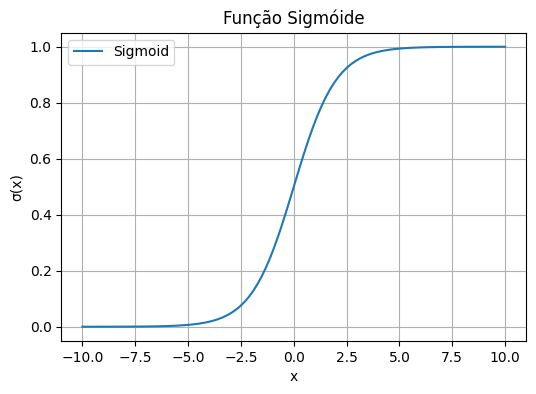

In [24]:
plt.figure(figsize=(6,4))
plt.plot(x, y, label='Sigmoid')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.title('Função Sigmóide')
plt.legend()
plt.grid()
plt.show()

In [25]:
# Propagação para Frente (Forward Pass)
def forward_pass(x, w, b):
    return sigmoid(np.dot(x, w) + b)

## Propagação para Frente (Forward Pass)
A propagação para frente calcula a saída de um neurônio aplicando pesos e viés:

$$ y_{pred} = \sigma(Wx + b) $$

Isso nos permite obter a predição da rede.

## Soma dos Quadrados dos Resíduos (SSR)
A função de erro utilizada para medir a discrepância entre os valores preditos e os valores reais
é a soma dos quadrados dos resíduos:

$$ SSR = \sum (y_{real} - y_{pred})^2 $$

Esse erro será minimizado usando o **Gradient Descent**.


In [26]:
# Gradiente da SSR em relação aos pesos e viés
def compute_gradients(x, y_real, y_pred):
    error = y_real - y_pred
    dW = -2 * np.dot(x.T, error * sigmoid_derivative(y_pred))
    dB = -2 * np.sum(error * sigmoid_derivative(y_pred))
    return dW, dB

## Cálculo dos Gradientes (Backpropagation)
O cálculo dos gradientes permite atualizar os pesos e viés de maneira eficiente:

$$ \frac{d}{dW} SSR $$ e $$ \frac{d}{dB} SSR $$

Esse gradiente será usado para ajustar os parâmetros na descida do gradiente

In [27]:
# Descida do Gradiente
def gradient_descent(x, y_real, w, b, learning_rate=0.01, epochs=100):
    for _ in range(epochs):
        y_pred = forward_pass(x, w, b)
        dW, dB = compute_gradients(x, y_real, y_pred)
        w -= learning_rate * dW
        b -= learning_rate * dB
    return w, b

## Gradient Descent
O método de descida do gradiente é utilizado para encontrar os valores ótimos dos pesos e vieses.
A atualização ocorre iterativamente segundo a regra:

$$ W := W - \eta \cdot \frac{d}{dW} SSR $$
$$ B := B - \eta \cdot \frac{d}{dB} SSR $$

onde $\eta$ é a **taxa de aprendizado**.

## Exemplo Prático: Ajustando os Pesos de uma Rede Neural Simples
A seguir, treinaremos um neurônio simples para ajustar pesos e viés.

In [28]:
# Gerando dados fictícios
np.random.seed(42)
x_data = np.random.rand(100, 1)
y_data = 2 * x_data + 1 + 0.1 * np.random.randn(100, 1)  # Relação linear com ruído

# Inicialização de pesos e viés
w_init = np.random.randn(1, 1)
b_init = np.random.randn(1)

# Treinamento
w_trained, b_trained = gradient_descent(x_data, y_data, w_init, b_init)

**Pesos finais:** {w_trained.flatten()[0]:.4f}

**Viés final:** {b_trained.flatten()[0]:.4f}

In [29]:
print(f'Pesos finais: {w_trained.flatten()[0]:.4f}')
print(f'Viés final: {b_trained.flatten()[0]:.4f}')

Pesos finais: 24.2612
Viés final: 38.6982


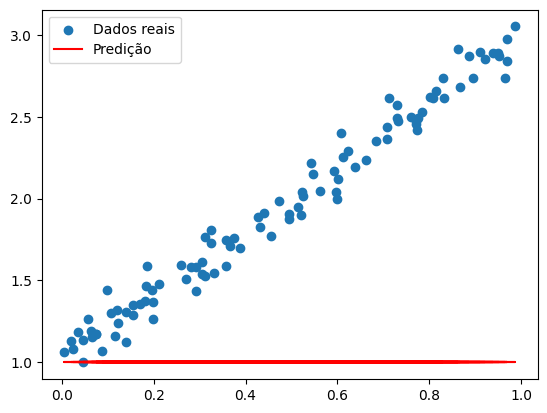

In [30]:
plt.scatter(x_data, y_data, label="Dados reais")
plt.plot(x_data, forward_pass(x_data, w_trained, b_trained), color='red', label="Predição")
plt.legend()
plt.show()